In [173]:
import os
import math
import datetime
import numpy as np
import pandas as pd
from tqdm import tqdm

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(15,10)
sns.set(rc={'figure.figsize':(20,10)})
plt.style.use('seaborn') # seaborn 스타일로 변환
plt.rc('font', family='AppleGothic')
plt.rc('axes', unicode_minus=False)

In [175]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [176]:
sale = pd.read_excel(os.path.join('..', '..', '0.Data', '01_제공데이터', 'sale_data_v05_0828.xlsx'))
meta = pd.read_excel(os.path.join('..', '..', '0.Data', '01_제공데이터', 'sale_meta_v04_0823.xlsx'))
item = pd.read_excel(os.path.join('..', '..', '0.Data', '01_제공데이터', 'item_meta_v04_0828.xlsx'))

In [177]:
sale['판매량'] = sale['취급액'] / sale['판매단가']
sale['판매량'] = sale['판매량'].fillna(0).apply(lambda x : math.ceil(x))

In [178]:
sale['방송일'] = sale['방송일시'].dt.date
sale['방송일'] = pd.to_datetime(sale['방송일'])

In [179]:
df = pd.pivot_table(sale, index = '상품군', columns = '방송일', values = '판매량', aggfunc=np.mean)

In [180]:
pivT = df.T

In [181]:
ema_s = pivT.ewm(span=4).mean()
ema_m = pivT.ewm(span=12).mean()
ema_l = pivT.ewm(span=26).mean()
macd = ema_s - ema_l
sig = macd.ewm(span=9).mean()

In [182]:
rol14 = df.T.fillna(0).rolling(14).mean()
rol30 = df.T.fillna(0).rolling(30).mean()

In [183]:
for tb, column in zip([ema_s, ema_m, ema_l, macd, sig, rol14, rol30], ['ema_s', 'ema_m', 'ema_l', 'macd', 'sig', 'rol14', 'rol30']):
    new_columns = list(map(lambda x : '_'.join((column, x)), tb.columns))
    tb.columns = new_columns

In [184]:
timeS = pd.concat([ema_s, ema_m, ema_l, macd, sig, rol14, rol30], axis = 1)

In [185]:
timeS

,ema_s_가구,ema_s_가전,ema_s_건강기능,ema_s_농수축,ema_s_무형,ema_s_생활용품,ema_s_속옷,ema_s_의류,ema_s_이미용,ema_s_잡화,...,rol30_건강기능,rol30_농수축,rol30_무형,rol30_생활용품,rol30_속옷,rol30_의류,rol30_이미용,rol30_잡화,rol30_주방,rol30_침구
방송일,,,,,,,,,,,,,,,,,,,,,
2019-01-01,nan,103.833,nan,1389.222,nan,nan,451.385,358.458,1867.000,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2019-01-02,nan,43.156,343.333,1049.535,nan,395.000,335.957,307.433,1867.000,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2019-01-03,nan,24.114,396.458,905.980,nan,404.792,282.707,289.277,972.882,285.222,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2019-01-04,nan,41.372,356.088,962.400,nan,470.714,335.482,233.585,1181.831,285.222,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2019-01-05,nan,31.849,356.088,1091.640,nan,470.714,340.451,308.985,764.926,165.574,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-28,8.911,55.787,607.586,1367.817,0.000,129.891,718.254,226.109,1011.967,322.863,...,279.771,1142.410,0.000,163.557,367.574,499.379,1051.107,242.021,328.268,0.000
2019-12-29,8.911,156.955,607.586,1225.957,0.000,120.453,534.469,204.199,937.358,530.520,...,276.837,1136.564,0.000,164.063,368.083,489.045,1054.877,268.153,339.884,0.000
2019-12-30,8.911,160.081,448.975,1198.134,0.000,126.630,399.808,270.453,1031.682,448.865,...,287.710,1145.144,0.000,164.110,366.328,476.084,1046.960,251.356,336.777,0.000


In [125]:
timeS = timeS.drop(timeS.columns[timeS.columns.str.contains('무형')], axis = 1)

In [165]:
timeS = timeS.reset_index()
timeS['방송일'] = pd.to_datetime(timeS['방송일'])

In [131]:
timeS.to_csv(os.path.join('..', '..', '0.Data', '03_외부데이터', '전처리', 'prep_2019_pb_timeseries.csv'), encoding = 'cp949', index = False)

In [166]:
timeS = pd.read_csv(os.path.join('..', '..', '0.Data', '03_외부데이터', '전처리', 'prep_2019_pb_timeseries.csv'), encoding = 'cp949')

In [169]:
timeS['방송일'] = pd.to_datetime(timeS['방송일'])

In [150]:
temp = pd.DataFrame(columns = ['ema_s', 'ema_m', 'ema_l', 'macd', 'sig', 'rol14', 'rol30'])

In [151]:
sale = pd.concat([sale, temp], axis = 1)

In [170]:
for dt, cate in tqdm(sale[['방송일', '상품군']].drop_duplicates().values):
    try:
        sale.loc[(sale['방송일'] == dt) & (sale['상품군'] == cate), ['ema_s', 'ema_m', 'ema_l', 'macd', 'sig', 'rol14', 'rol30']] = timeS.loc[timeS['방송일'] == dt, timeS.columns[timeS.columns.str.contains(cate)]].values
        break
    except:
        break
        continue
        
    break

  0%|          | 0/3174 [00:00<?, ?it/s]


In [171]:
sale.loc[(sale['방송일'] == dt) & (sale['상품군'] == cate), ['ema_s', 'ema_m', 'ema_l', 'macd', 'sig', 'rol14', 'rol30']]

,ema_s,ema_m,ema_l,macd,sig,rol14,rol30
0,358.458,358.458,358.458,0,0,NaN,NaN
1,358.458,358.458,358.458,0,0,NaN,NaN
2,358.458,358.458,358.458,0,0,NaN,NaN
3,358.458,358.458,358.458,0,0,NaN,NaN
4,358.458,358.458,358.458,0,0,NaN,NaN
5,358.458,358.458,358.458,0,0,NaN,NaN
9,358.458,358.458,358.458,0,0,NaN,NaN
10,358.458,358.458,358.458,0,0,NaN,NaN
11,358.458,358.458,358.458,0,0,NaN,NaN
12,358.458,358.458,358.458,0,0,NaN,NaN


In [172]:
timeS.loc[timeS['방송일'] == dt, timeS.columns[timeS.columns.str.contains(cate)]]

,ema_s_의류,ema_m_의류,ema_l_의류,macd_의류,sig_의류,rol14_의류,rol30_의류
0,358.458333,358.458333,358.458333,0.0,0.0,NaN,NaN


# TimeSeries EDA

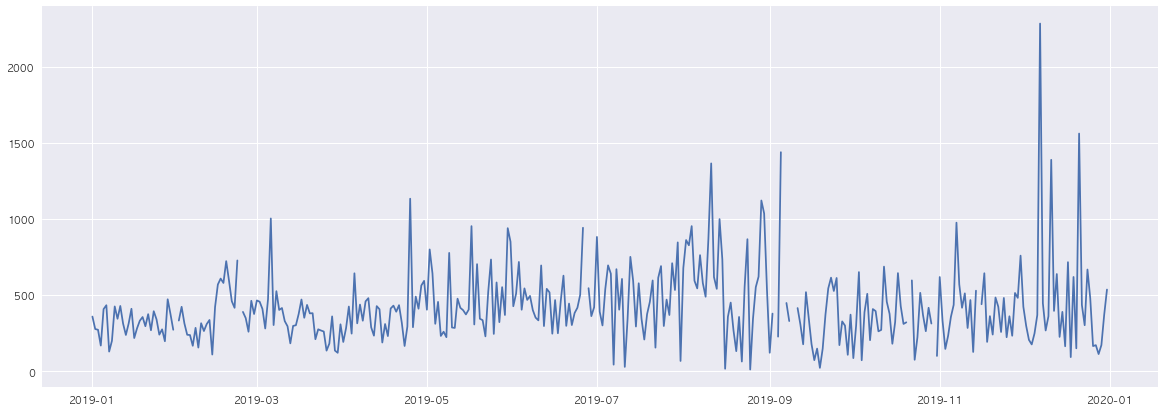

In [570]:
plt.figure(figsize = (20, 7))
plt.plot(df.T['의류'])

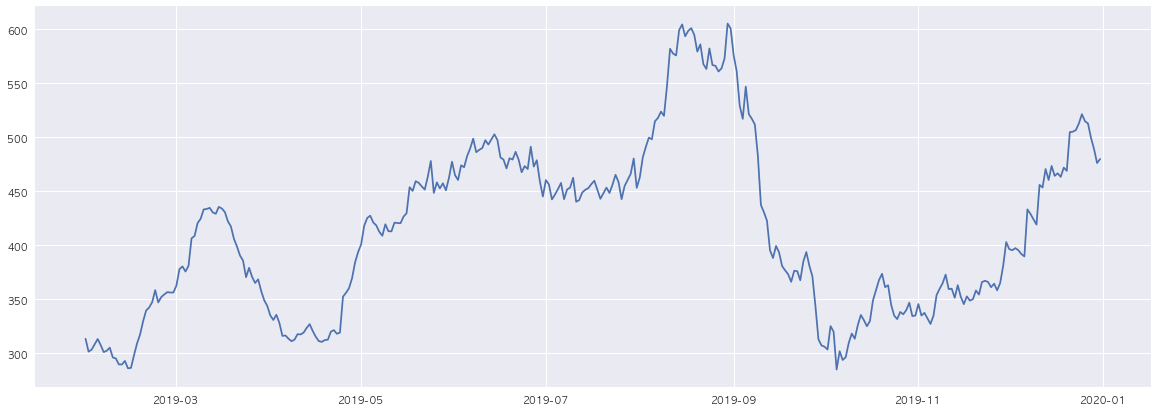

In [571]:
plt.figure(figsize = (20, 7))
plt.plot(df.T.fillna(0).rolling(30).mean()['의류'])

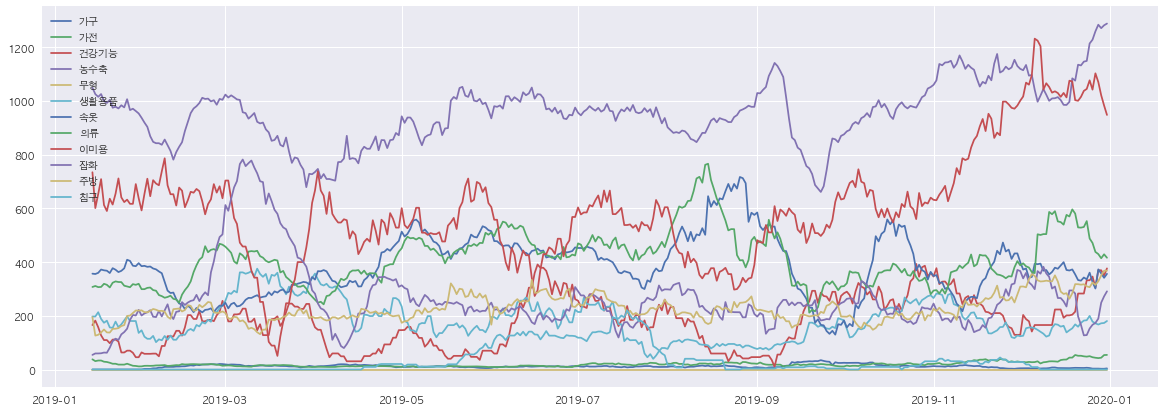

In [606]:
plt.figure(figsize = (20, 7))
plt.plot(df.T.fillna(0).rolling(14).mean())
plt.legend(df.T.fillna(0).rolling(14).mean().columns)
plt.show()

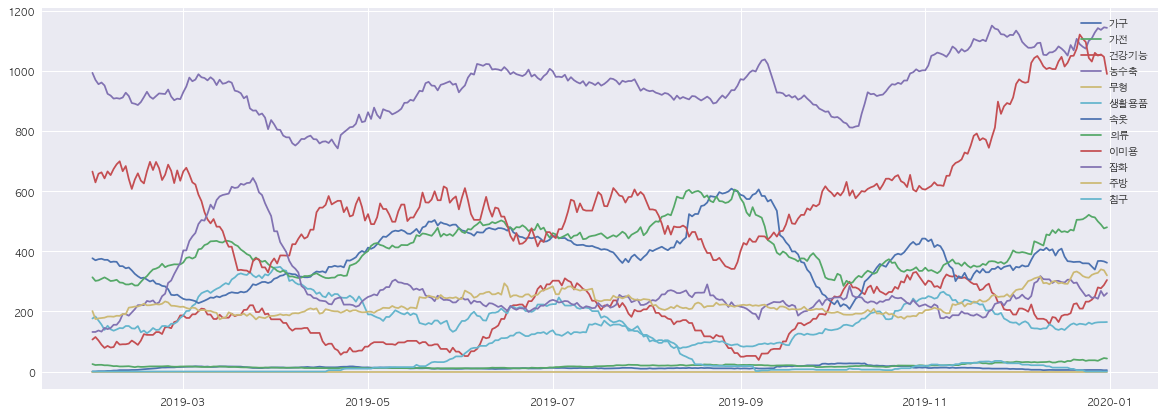

In [610]:
plt.figure(figsize = (20, 7))
plt.plot(df.T.fillna(0).rolling(30).mean())
plt.legend(df.T.fillna(0).rolling(30).mean().columns)
plt.show()

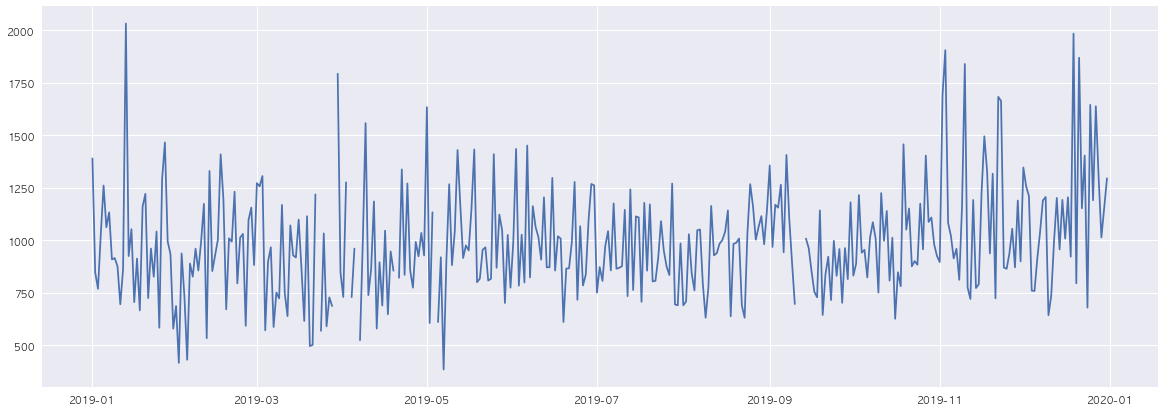

In [630]:
plt.figure(figsize = (20, 7))
plt.plot(df.T['농수축'])
plt.show()

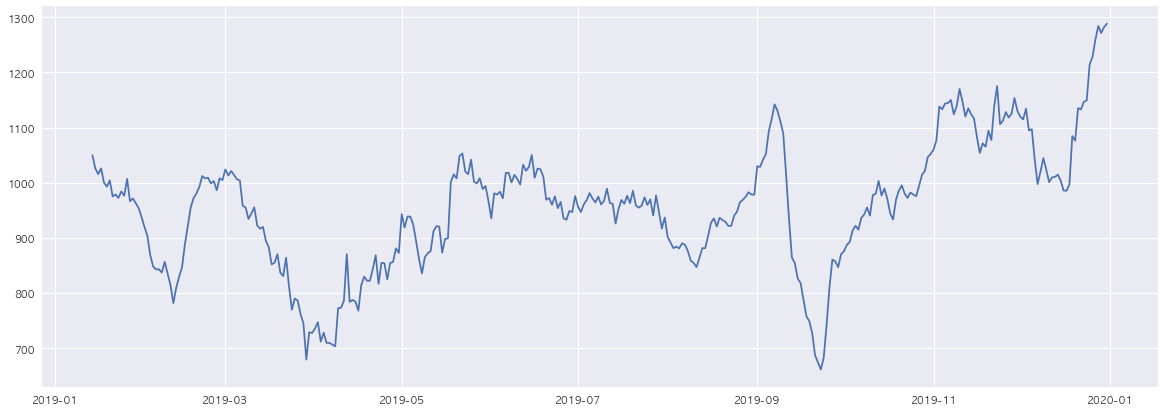

In [624]:
plt.figure(figsize = (20, 7))
plt.plot(df.T.fillna(0).rolling(14).mean()['농수축'])
plt.show()

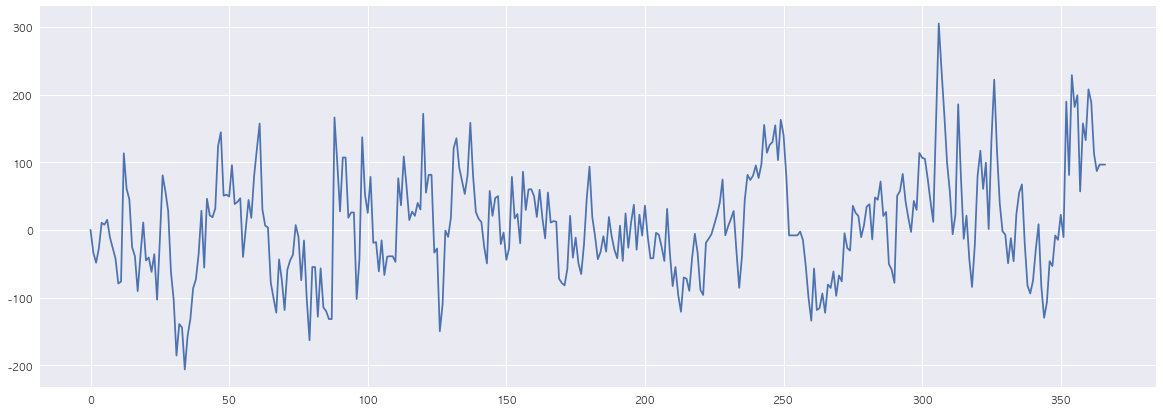

In [627]:
plt.figure(figsize = (20, 7))
plt.plot(macd.T['농수축'].values)
plt.show()